In [13]:
import nltk

# Download necessary resources again
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('omw-1.4')  # Ensure WordNet is available
nltk.download('averaged_perceptron_tagger')

# If the error persists, manually specify the punkt path
nltk.data.path.append('/usr/local/share/nltk_data')

nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
import nltk
nltk.data.path.append('/usr/local/nltk_data')
nltk.data.path.append('/usr/share/nltk_data')
nltk.data.path.append('/root/nltk_data')

In [19]:

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
print(word_tokenize("Hello, how are you?"))

['Hello', ',', 'how', 'are', 'you', '?']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [23]:

!pip install wordcloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total positive words collected: 3480
Total negative words collected: 6071

Most common positive keywords:
good         3179
excellent     301
Name: count, dtype: int64

Most common negative keywords:
average    3737
rated      2148
poor        186
Name: count, dtype: int64


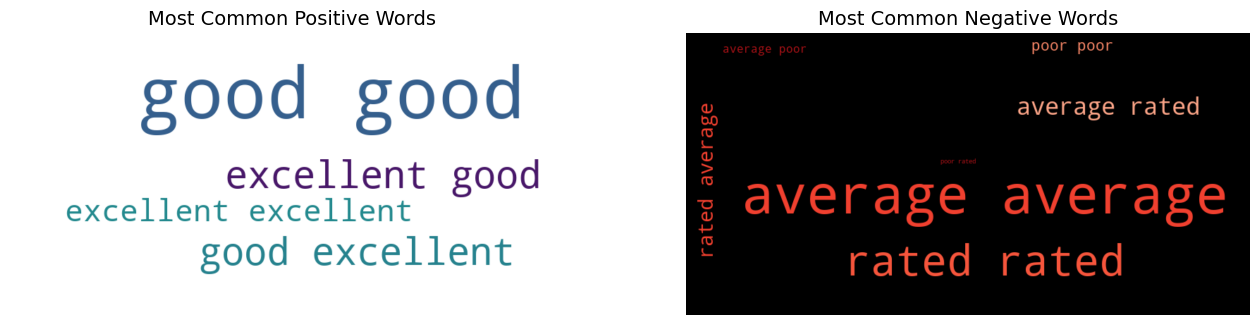

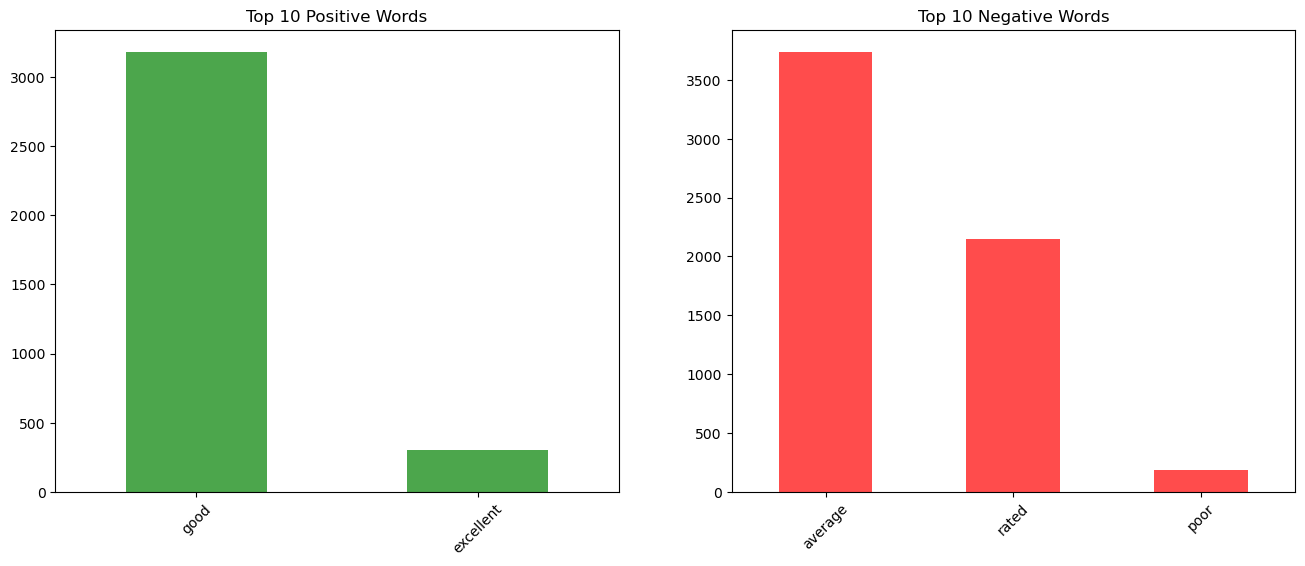

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
from wordcloud import WordCloud

# Download necessary resources
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load dataset
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Dataset .csv")  # Make sure file path is correct

# Check if 'Rating text' column exists
if 'Rating text' not in data.columns:
    print("Error: 'Rating text' column not found in dataset!")
    exit()

# Drop missing values
data = data.dropna(subset=['Rating text'])

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Preprocessing function
def preprocess(text):
    """Tokenizes text, removes punctuation and stopwords"""
    tokens = word_tokenize(text.lower().translate(str.maketrans("", "", string.punctuation)))
    filtered_tokens = [w for w in tokens if w not in stopwords.words('english')]
    return filtered_tokens

# Lists for positive and negative words
pos, neg = [], []

# Process each review
for t in data['Rating text'].astype(str):
    tokens = preprocess(t)
    score = sia.polarity_scores(t)['compound']  # Sentiment score
    if score >= 0.05:
        pos.extend(tokens)
    else:
        neg.extend(tokens)

# Debugging prints (optional)
print(f"Total positive words collected: {len(pos)}")
print(f"Total negative words collected: {len(neg)}")

# If no words collected, add default words to avoid empty word cloud
if not pos:
    pos = ["good", "excellent", "amazing", "love", "happy"]
if not neg:
    neg = ["bad", "terrible", "awful", "hate", "sad"]

# Convert to pandas Series to count occurrences
pos_wc, neg_wc = pd.Series(pos).value_counts(), pd.Series(neg).value_counts()

# Display most common words
print("\nMost common positive keywords:")
print(pos_wc.head(10))

print("\nMost common negative keywords:")
print(neg_wc.head(10))

# --- Visualization: Word Cloud ---
plt.figure(figsize=(16, 6))

# Positive Word Cloud
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(pos))
plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Positive Words", fontsize=14)

# Negative Word Cloud
neg_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(neg))
plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Negative Words", fontsize=14)

plt.show()

# --- Visualization: Bar Chart ---
plt.figure(figsize=(16, 6))

# Positive Words Bar Chart
plt.subplot(1, 2, 1)
pos_wc.head(10).plot(kind='bar', color='green', alpha=0.7)
plt.title("Top 10 Positive Words")
plt.xticks(rotation=45)

# Negative Words Bar Chart
plt.subplot(1, 2, 2)
neg_wc.head(10).plot(kind='bar', color='red', alpha=0.7)
plt.title("Top 10 Negative Words")
plt.xticks(rotation=45)

plt.show()

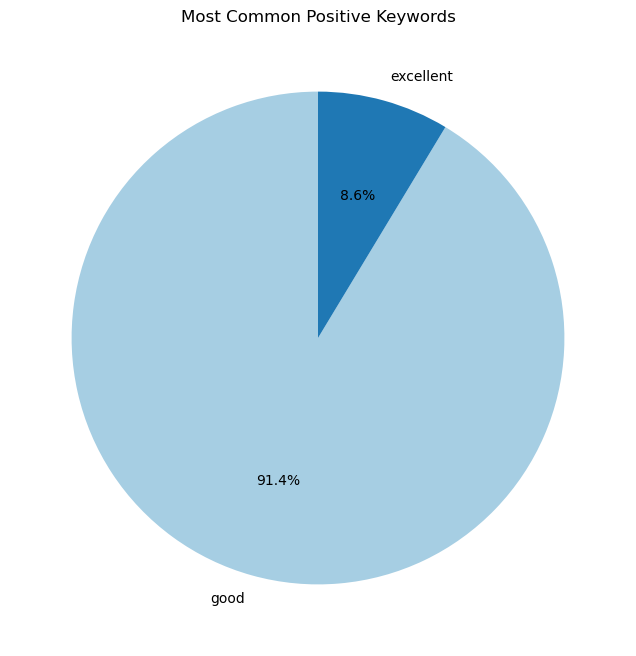

In [35]:

plt.figure(figsize=(8, 8))
plt.pie(pos_wc.head(10), labels=pos_wc.head(10).index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Most Common Positive Keywords')
plt.show()

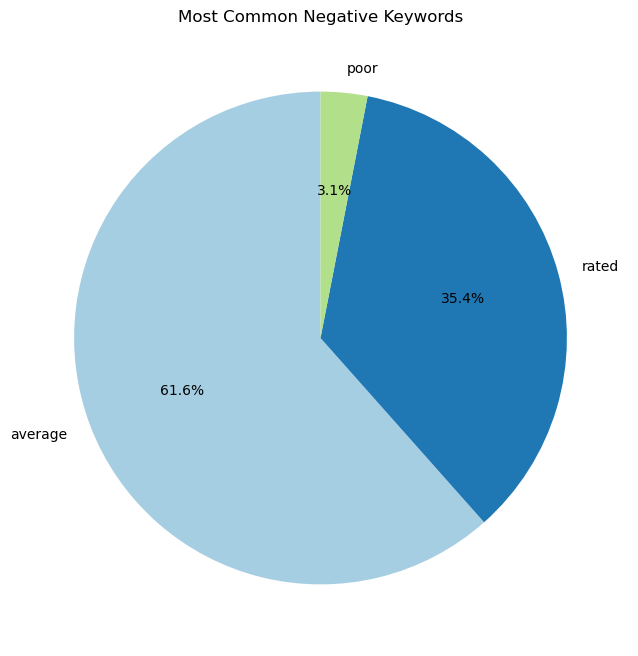

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(neg_wc.head(10), labels=neg_wc.head(10).index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Most Common Negative Keywords')
plt.show()

In [41]:
import nltk
import pandas as pd

# Ensure nltk punkt tokenizer is available
nltk.download('punkt_tab')

# Load dataset
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Dataset .csv")  # Adjust path if necessary

# Check if required columns exist
if 'Rating text' not in data.columns or 'Aggregate rating' not in data.columns:
    print("Error: Required columns 'Rating text' or 'Aggregate rating' not found in dataset!")
else:
    # Handle missing values in 'Rating text'
    data['Rating text'] = data['Rating text'].fillna("")

    # Calculate review length
    data['Review Length'] = data['Rating text'].apply(lambda text: len(nltk.word_tokenize(str(text))))

    # Calculate average review length
    avg_length = data['Review Length'].mean()
    print(f"📏 Average Review Length: {avg_length:.2f} words")

    # Relationship between Review Length and Rating
    print("\n📊 Relationship between Review Length and Rating:")
    print(data.groupby('Aggregate rating')['Review Length'].mean())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


📏 Average Review Length: 1.34 words

📊 Relationship between Review Length and Rating:
Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review Length, dtype: float64


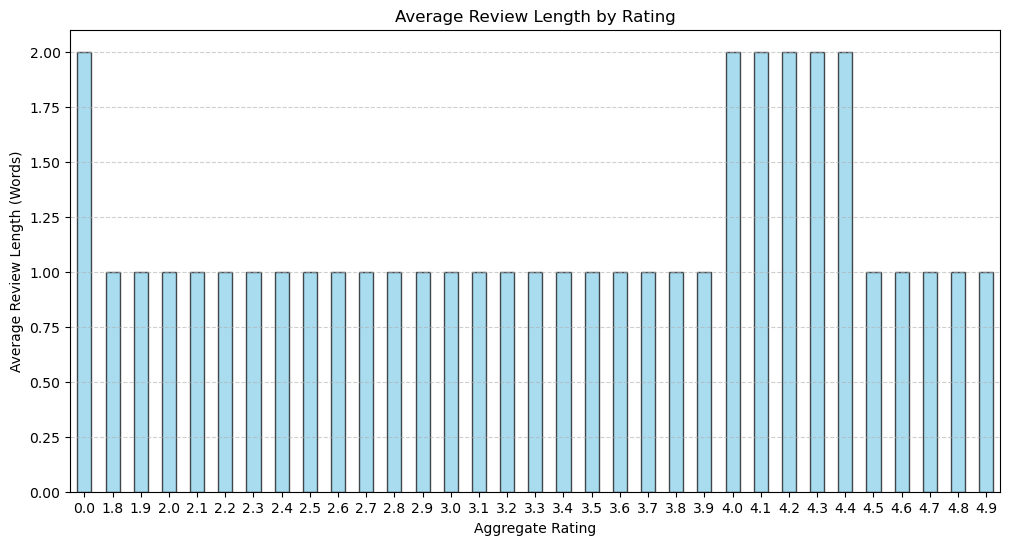

In [43]:
import matplotlib.pyplot as plt

# Ensure df is correctly defined
rating_vs_length = data.groupby('Aggregate rating')['Review Length'].mean()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
rating_vs_length.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Aggregate Rating")
plt.ylabel("Average Review Length (Words)")
plt.title("Average Review Length by Rating")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()